# Reading and Understanding the Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load dataset
df_main = pd.read_csv('Telecom_Charge_Prediction.csv')

In [3]:
df_main.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


# Train-Test Split

In [4]:
# Separating target variable and its features
y = df_main['TotalCharges']
X = df_main.drop('TotalCharges',axis=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# To avoid data leakage

In [6]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (5625, 18)
x test:  (1407, 18)
y train:  (5625,)
y test:  (1407,)


# Model Creation/Evaluation

Applying regression models

1.Linear Regression

2.Ridge Regression

3.Lasso Regression

4.Random Forest Regression

5.Gradient Boosting regression

In [8]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [9]:
CV = []
R2_train = []
R2_test = []

def Telecom_Charge_Prediction(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

# Linear Regression

Train R2-score : 0.91
Test R2-score : 0.9
Train CV scores : [0.91031703 0.90138795 0.91044851 0.90604021 0.90205564]
Train CV mean : 0.91


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


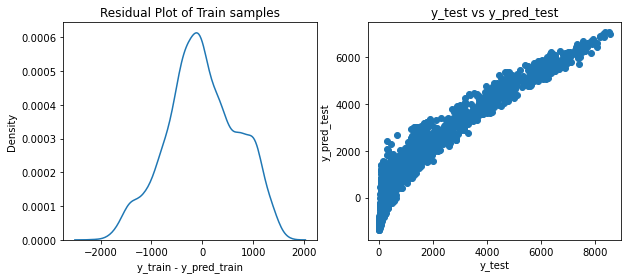

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
Telecom_Charge_Prediction(lr,"Linear_regressor.pkl")

In [11]:
lr.intercept_

-2412.6231884779586

In [12]:
lr.coef_

array([ 25.98561707, -39.26293616,   4.3918409 , -39.67011703,
        61.61538654, -58.93145157,  29.1613041 , -18.46386062,
       119.16211344, 141.88824451, 100.09521926, 106.42261989,
        40.00669469,  48.08494179, -83.01857152, -15.83261141,
        52.06461762,  34.74503129])

# Ridge Regression

Train R2-score : 0.91
Test R2-score : 0.9
Train CV scores : [0.91032424 0.90145148 0.91060682 0.90594749 0.90208869]
Train CV mean : 0.91


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


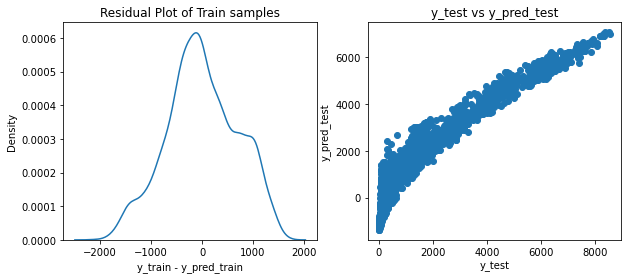

In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

Telecom_Charge_Prediction(rg_rs,"ridge.pkl")

# Lasso Regression

Train R2-score : 0.91
Test R2-score : 0.9
Train CV scores : [0.91027195 0.90127578 0.91052195 0.90573376 0.90210501]
Train CV mean : 0.91


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


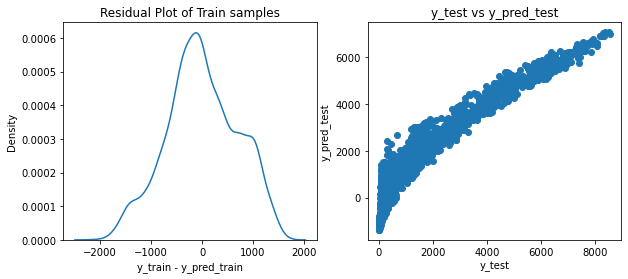

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
Telecom_Charge_Prediction(ls_rs,"lasso.pkl")

# Random Forest

Train R2-score : 1.0
Test R2-score : 1.0
Train CV scores : [0.99852925 0.99855919 0.99850743 0.97921833 0.99859683]
Train CV mean : 0.99


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


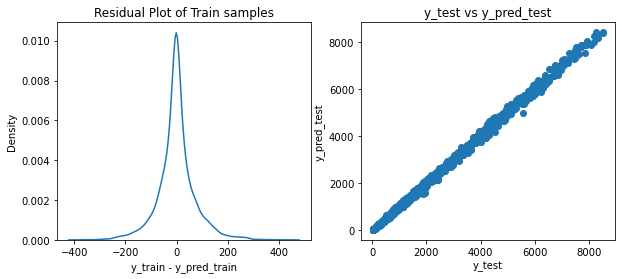

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
Telecom_Charge_Prediction(rf_rs,'random_forest.pkl')

In [16]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_leaf=7, min_samples_split=6,
                      n_estimators=800)


# Gradient Boosting

Train R2-score : 1.0
Test R2-score : 1.0
Train CV scores : [0.9987251  0.99866324 0.99860718 0.9985998  0.99866006]
Train CV mean : 1.0


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


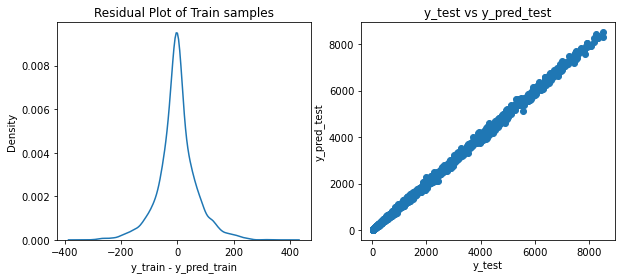

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
Telecom_Charge_Prediction(gb_rs,"gradient_boosting.pkl")

In [18]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.91,0.9,0.91
1,Ridge,0.91,0.9,0.91
2,Lasso,0.91,0.9,0.91
3,RandomForestRegressor,1.00,1.0,0.99
4,GradientBoostingRegressor,1.00,1.0,1.00


##### Gradient boosting trees can be more accurate than random forests. Because we train them to correct each other's errors, they're capable of capturing complex patterns in the data. 

In [19]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
3451,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,19.50
611,1,0,0,1,66,1,0,2,1,1,1,1,1,1,2,0,3,20.55
588,1,0,1,1,71,1,2,0,2,2,2,2,2,2,2,0,2,90.40
2680,0,0,1,0,72,1,2,1,2,2,2,0,2,0,2,0,0,100.65
1544,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,3,45.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1,0,0,0,19,1,0,0,0,2,0,2,0,2,1,1,0,65.35
5192,0,0,1,1,70,1,2,1,0,2,2,0,2,2,1,1,2,106.50
3980,0,0,0,0,11,1,2,1,0,0,0,0,0,0,0,1,2,76.50
235,1,0,0,0,2,1,2,0,0,2,0,0,0,0,0,1,3,54.40


In [30]:
hp=gb_rs.fit(X_train,y_train)

In [32]:
hp.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 4,
 'learning_rate': 0.1}

In [33]:
finalmodel = GradientBoostingRegressor(n_estimators=500,min_samples_split=4,max_features="auto",max_depth=4,learning_rate=0.01,min_samples_leaf= 7)

In [34]:
finalmodel.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='auto',
                          min_samples_leaf=7, min_samples_split=4,
                          n_estimators=500)

In [35]:
import numpy as np
finalmodel.predict([[0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85]])

array([48.58339076])

In [36]:
import pickle 
filename = 'finalized_Charge_model.pk'
pickle.dump(finalmodel, open(filename, 'wb'))

In [37]:
loaded_model1 = pickle.load(open(filename, 'rb'))

In [38]:
loaded_model1.predict([[0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85]])

array([48.58339076])

In [39]:
type(loaded_model1)

sklearn.ensemble._gb.GradientBoostingRegressor

In [40]:
loaded_model1

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='auto',
                          min_samples_leaf=7, min_samples_split=4,
                          n_estimators=500)